In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
df = pd.read_csv("archive/cleaned_steam_db_v1.csv")
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_3988\2334290825.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("archive/cleaned_steam_db_v1.csv")


,Unnamed: 0,type,name,steam_appid,required_age,is_free,genres,platform_windows,platform_mac,platform_linux,...,lang_po,lang_zh,lang_ja,lang_ko,lang_it,lang_ru,lang_ar,tool,nsfw,film
0,0,demo,Pin Them Demo,1904630.0,0,True,[],True,False,False,...,False,False,False,False,False,False,False,False,False,NaN
1,1,game,Al-Qadim: The Genie's Curse,1904640.0,0,False,"[1, 3]",True,False,False,...,False,False,False,False,False,False,False,False,False,NaN
2,2,game,Dungeons & Dragons - Stronghold: Kingdom Simul...,1904650.0,0,False,"[28, 2]",True,False,False,...,False,False,False,False,False,False,False,False,False,NaN
3,3,game,Chapel 3-D: The Ascent,1904680.0,0,False,"[1, 23]",True,False,False,...,True,False,False,False,False,False,False,False,False,NaN
4,4,game,VTuber Gallery : Anime Pose,1904690.0,0,True,"[51, 53, 55, 57, 59, 70]",True,False,False,...,False,False,False,False,False,False,False,True,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115965,115965,video,The Chair,966800.0,13,False,[80],True,True,True,...,False,False,False,False,False,False,False,False,False,True
115966,115966,video,Head,966810.0,13,False,[80],True,True,True,...,False,False,False,False,False,False,False,False,False,True
115967,115967,video,The Barn,966820.0,13,False,[80],True,True,True,...,False,False,False,False,False,False,False,False,False,True
115968,115968,video,Be My Cat: A Film for Anne,966830.0,13,False,[80],True,True,True,...,False,False,False,False,False,False,False,False,False,True


In [3]:
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df["coming_date"] = pd.to_datetime(df["coming_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115970 entries, 0 to 115969
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   type                115970 non-null  object        
 1   name                115956 non-null  object        
 2   steam_appid         115970 non-null  float64       
 3   required_age        115970 non-null  int64         
 4   is_free             115970 non-null  bool          
 5   genres              115970 non-null  object        
 6   platform_windows    115970 non-null  bool          
 7   platform_mac        115970 non-null  bool          
 8   platform_linux      115970 non-null  bool          
 9   storage_mb          87119 non-null   float64       
 10  memory_mb           87338 non-null   float64       
 11  coming_date         101977 non-null  datetime64[ns]
 12  coming_soon         115970 non-null  bool          
 13  package_number      115970 no

C:\Users\DELL\AppData\Local\Temp\ipykernel_3988\3556095663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["coming_date"] = pd.to_datetime(df["coming_date"])


## Type, Name, App ID

<Axes: xlabel='count', ylabel='type'>

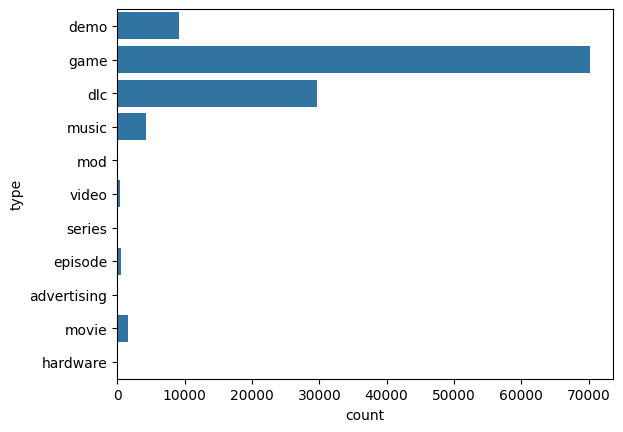

In [4]:
sns.countplot(df, y="type")

In [5]:
df = df[df["name"].notna()]

In [6]:
df["steam_appid"].duplicated().sum()

20935

In [7]:
df.drop_duplicates(subset="steam_appid", inplace=True)
print("Number of duplicated rows: {}".format(df["steam_appid"].duplicated().sum()))
print(f"Dataframe shape: {df.shape}")

Number of duplicated rows: 0
Dataframe shape: (95021, 38)


## Release date

In [8]:
curr_date = pd.to_datetime('today').normalize()

def get_date_encoding(x):
	global curr_date
	
	if pd.isna(x):
		return 0
	
	time_dist = pd.Timedelta(curr_date - x).days
	if time_dist < 0:
		return 0
	elif time_dist < 275:	# Half a year
		return 1
	elif time_dist < 730:	# 2 years
		return 2
	elif time_dist < 1826:	# 5 years
		return 3
	else:
		return 4

df["release_date_code"] = df["coming_date"].apply(get_date_encoding)

In [9]:
df = df.loc[df[(~df["coming_soon"]) | (df["release_date_code"] == 0)].index, :]
df.drop(columns=["coming_soon"], inplace=True)

In [10]:
df["release_date_code"].unique()

array([2, 3, 0, 1, 4], dtype=int64)

<Axes: xlabel='release_date_code', ylabel='count'>

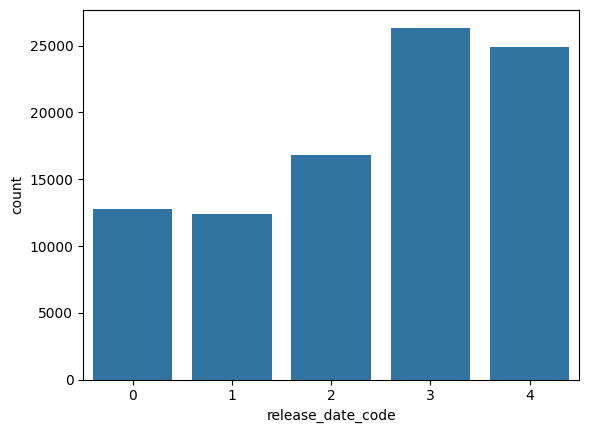

In [11]:
sns.countplot(df, x="release_date_code")

## Currency

In [12]:
df["currency"].unique()

array([nan, 'VND', 'RUB', 'JPY', 'UYU', 'USD', 'KRW', 'CAD', 'PHP', 'EUR',
       'GBP', 'CNY', 'MYR', 'CHF', 'PLN', 'NZD', 'BRL', 'AUD', 'COP',
       'IDR', 'UAH', 'TWD', 'SAR', 'KZT', 'CLP', 'HKD', 'ILS', 'THB',
       'INR', 'SGD', 'MXN'], dtype=object)

In [13]:
df["initial_price"] /= 100
df["final_price"] /= 100

In [14]:
currency_map = {
	"VND": 0.00004005,	"RUB": 0.010932,	"JPY": 0.006614,	"UYU": 0.026613,
	"USD": 1.00000000,	"KRW": 0.000743,	"CAD": 0.738347,	"PHP": 0.017813,
	"EUR": 1.079713,	"GBP": 1.263593,	"CNY": 0.138508,	"MYR": 0.211665,
	"CHF": 1.109108,	"PLN": 0.251197,	"NZD": 0.598600,	"BRL": 0.199382,
	"AUD": 0.652695,	"COP": 0.000258,	"IDR": 0.000063,	"UAH": 0.025478,
	"TWD": 0.031289,	"SAR": 0.266666,	"KZT": 0.002236,	"CLP": 0.001019,
	"HKD": 0.127774,	"ILS": 0.271195,	"THB": 0.027524,	"INR": 0.012002,
	"SGD": 0.741905,	"MXN": 0.060350
}

def to_usd(value, currency):
	global currency_map
	if pd.isna(value):
		return 0.0
	return value * currency_map[currency]

df["initial_price_usd"] = df.apply(lambda x: to_usd(x["initial_price"], x["currency"]), axis=1)
df["final_price_usd"] = df.apply(lambda x: to_usd(x["final_price"], x["currency"]), axis=1)

In [15]:
df["initial_price_usd"].min(), df["initial_price_usd"].max()

(0.0, 199.99)

In [16]:
df["discount_percent"].fillna(0.0, inplace=True)

In [17]:
df.drop(columns=["currency", "initial_price", "final_price"], inplace=True)

## Null treatment to all variables

In [18]:
df[df["developers_amount"].isna()]["name"].to_list()

['Restaurant Renovator Playtest',
 'Barista: Rise and Grind Playtest',
 'Blackjack Avenue Playtest',
 'Islets Playtest',
 'Snow Plow Playtest',
 'Hunter Project: Operation Survive Playtest',
 '虚拟主播模拟器 Playtest',
 'Home VR Playtest',
 'Orbit.Industries Playtest',
 'Tactical Squad – SWAT Stories Playtest',
 'Technicity Playtest',
 "Indy Pro '22: Rebirth of the Territories Playtest",
 'Rotor Playtest',
 "Vittorio Corbo's Un-BEATable Playtest",
 '乳膠地牢 Playtest',
 'Wardens Playtest',
 '遗忘之地 Playtest',
 'Rustforge Playtest',
 'Lunch Tycoon',
 'CYBERHUNK Playtest',
 'Super Liquid Soccer Playtest',
 'Cryptid Kitchen Playtest',
 'Elysium Above 履云录 Playtest',
 'Wormhole Adventurer Playtest',
 'ConquestAreas Playtest',
 'Terror of Hemasaurus Playtest',
 'Polygon Pursuit Playtest',
 'Roll Player Playtest',
 'Cardia Playtest',
 'Isletopia Playtest',
 'Bounters Playtest',
 '怪物制造 Playtest',
 'GunQuest Playtest',
 'RTM - The Last Days Playtest',
 'scuffed Playtest',
 'Samsara Playtest',
 'FRACTURED LI

In [19]:
df = df[df["developers_amount"].notna()]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89143 entries, 0 to 95410
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   type                89143 non-null  object        
 1   name                89143 non-null  object        
 2   steam_appid         89143 non-null  float64       
 3   required_age        89143 non-null  int64         
 4   is_free             89143 non-null  bool          
 5   genres              89143 non-null  object        
 6   platform_windows    89143 non-null  bool          
 7   platform_mac        89143 non-null  bool          
 8   platform_linux      89143 non-null  bool          
 9   storage_mb          68501 non-null  float64       
 10  memory_mb           68732 non-null  float64       
 11  coming_date         78283 non-null  datetime64[ns]
 12  package_number      89143 non-null  int64         
 13  discount_percent    89143 non-null  float64       


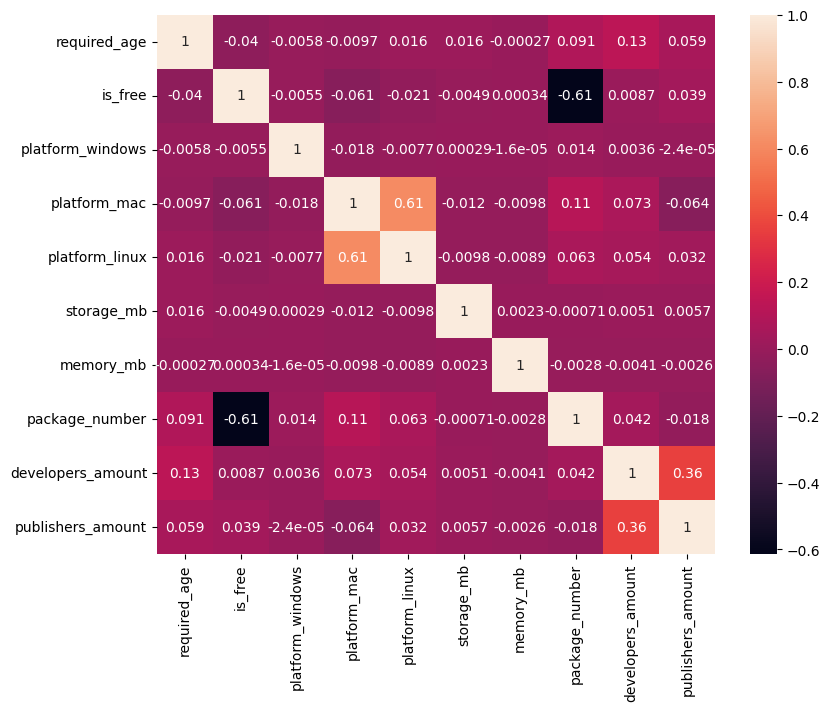

In [21]:
fig, ax = plt.subplots(figsize=(9, 7))

sns.heatmap(df[["required_age", "is_free", "platform_windows", "platform_mac", "platform_linux",
				"storage_mb", "memory_mb", "package_number", "developers_amount", "publishers_amount"]].corr(), annot=True, ax=ax)

plt.show()

In [22]:
df = df[df["storage_mb"].notna()]

In [23]:
df[df["memory_mb"].isna()]["name"].to_list()

['Project Medved',
 'Jessica Mysterious Journey',
 'Jessica Mystery of Courchevel',
 'Jessica Secret of the Caribbean',
 'Falta Soundtrack',
 'Elemental Roll',
 'Undeads vs Humans',
 'Kombinera OST',
 'Princess Pyro',
 'NecroArcher',
 'Nitro Nation VR Demo',
 'Diamon Jones and the Amulet of the World',
 'Pink Gum Soundtrack',
 'Tankocracy Demo',
 'Johnny Chainsaw Demo',
 'Outdoor Adventures With Marisa Kirisame',
 'Nachkriegsratten Punk-Rock Puzzle Soundtrack',
 'Undergrave Demo',
 'Dirty Girls',
 'Return Ace Soundtrack',
 'Space Shrooms RollPlay',
 'Runes of Pandemonium - Soundtrack',
 'Sirenhead: Southpoint',
 'Mini Island: Aroma',
 'Birding Simulator Demo',
 'Glitchhikers: The Spaces Between Deluxe Soundtrack 5-Volume Set',
 'BeeTheBest',
 "Project Wunderwaffe Soundtrack: Supporter's Pack",
 'Augma II - Arc I Soundtrack',
 'Ghost Marriage Matchmaking - Original Soundtrack',
 'Hammer Kid Soundtrack',
 'Zombie Within',
 'Re:Turn 2 - Runaway Soundtrack',
 '白昼夢の青写真 VOCAL COLLECTION',
 '

In [24]:
df = df[df["memory_mb"].notna()]

In [25]:
def drop_outlier_with_iqr(series):
	p_025 = np.percentile(series, 25)
	p_075 = np.percentile(series, 75)
	iqr = p_075 - p_025
	upper_range = p_075 + 1.5 * iqr
	lower_range = p_025 - 1.5 * iqr
	return upper_range, lower_range

def drop_outlier_with_percentile(series):
	p_001 = np.percentile(series, 1)
	p_099 = np.percentile(series, 99)
	return p_099, p_001

In [26]:
df["memory_gb"] = df["memory_mb"].apply(lambda x: x // 1000)
print("Range of IQR: {}".format( drop_outlier_with_iqr(df["memory_gb"]) ))
print("Range of percentile 0.01 & 0.99: {}".format( drop_outlier_with_percentile(df["memory_gb"]) ))

Range of IQR: (8.5, -3.5)
Range of percentile 0.01 & 0.99: (16.0, 0.0)


In [27]:
upper, lower = drop_outlier_with_percentile(df["memory_gb"])
# Keep games with low memory usage
df = df[df["memory_gb"] <= upper]
df.shape

(62317, 38)

In [28]:
df["storage_gb"] = df["storage_mb"].apply(lambda x: x // 1000)
print("Range of IQR: {}".format( drop_outlier_with_iqr(df["storage_gb"]) ))
print("Range of percentile 0.01 & 0.99: {}".format( drop_outlier_with_percentile(df["storage_gb"]) ))

Range of IQR: (10.0, -6.0)
Range of percentile 0.01 & 0.99: (53.0, 0.0)


In [29]:
df["storage_gb"].min(), df["storage_gb"].max()

(0.0, 45510.0)

In [32]:
df = df[df["storage_gb"] < 150]
df.shape

(62261, 39)

In [34]:
df.drop(columns=["storage_mb", "memory_mb"], inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62261 entries, 1 to 95410
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   type                62261 non-null  object        
 1   name                62261 non-null  object        
 2   steam_appid         62261 non-null  float64       
 3   required_age        62261 non-null  int64         
 4   is_free             62261 non-null  bool          
 5   genres              62261 non-null  object        
 6   platform_windows    62261 non-null  bool          
 7   platform_mac        62261 non-null  bool          
 8   platform_linux      62261 non-null  bool          
 9   coming_date         54512 non-null  datetime64[ns]
 10  package_number      62261 non-null  int64         
 11  discount_percent    62261 non-null  float64       
 12  developers_amount   62261 non-null  float64       
 13  publishers_amount   62261 non-null  int64         


In [36]:
df.to_csv("archive/cleaned_steam_db_v2.csv")